In [1]:
# !pip install pillow
# !pip install opencv-python
# !pip install matplotlib

# **Lectura de Imagenes**

## *OpenCV*

*Lectura:*   
```cv2.imread('path_to_image')```
 carga una imagen desde el archivo especificado. Por defecto, la imagen se carga en formato BGR (azul, verde, rojo).   

*Almacenamiento en memoria:*   
En OpenCV, las imágenes se almacenan como arrays de Numpy. Esto facilita la manipulación de la imagen ya que Numpy ofrece una amplia gama de operaciones matemáticas.

## *PIL*
*Lectura:*  
```Image.open('path_to_image')``` abre y carga una imagen.

*Almacenamiento en memoria:*  
PIL utiliza su propio tipo de objeto, Image, para manejar las operaciones de imagen. Sin embargo, se puede convertir fácilmente en un array de Numpy para su manipulación

# **Conversión a Arrays de Numpy y Viceversa**

*OpenCV a Numpy*  
La imagen leída por OpenCV ya es un array de Numpy, por lo que no se requiere una conversión adicional.

*PIL a Numpy*
Conversión:  
```numpy.array(pil_image)``` convierte una imagen de PIL en un array de Numpy.

*Numpy a PIL*
Conversión:
```Image.fromarray(numpy_array)``` convierte un array de Numpy en una imagen de PIL.

# Guardar Imágenes a Disco

## Matplotlib
```matplotlib.pyplot.imsave('path_to_save', numpy_array) ``` guarda una imagen. Matplotlib puede guardar arrays de Numpy como imágenes.

## OpenCV
```cv2.imwrite('path_to_save', cv2_image)``` guarda una imagen en el disco.

## PIL
```pil_image.save('path_to_save')``` guarda una imagen en el disco.


## 2.  Tomar dos fotos de una misma escena pero con diferentes iluminaciones.

### 1.) Construir en ambos casos los histogramas normalizados R,G,B (puede usar los 256 bines, u otra cantidad, por ejemplo 16 bines por cada canal de color).


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_histogram(image, title):
    plt.figure()
    bar_width = 1.0

    for i, color in enumerate(['r', 'g', 'b']):
        # Calcular histograma
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]).flatten()
        x = np.arange(256) - 0.5
        plt.bar(x, hist, width=bar_width, color=color, alpha=0.6)

        # Calcular y graficar el histograma acumulativo
        hist_cum = np.cumsum(hist)
        hist_cum = hist_cum / hist_cum.max() * hist.max()  # Normalizar para propósitos de visualización
        plt.plot(x + 0.5, hist_cum, color=color, linestyle='--')

    plt.xlim([-0.5, 255.5])
    plt.title(title)

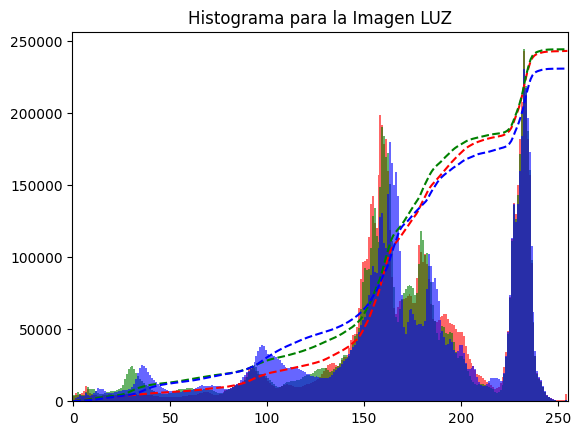

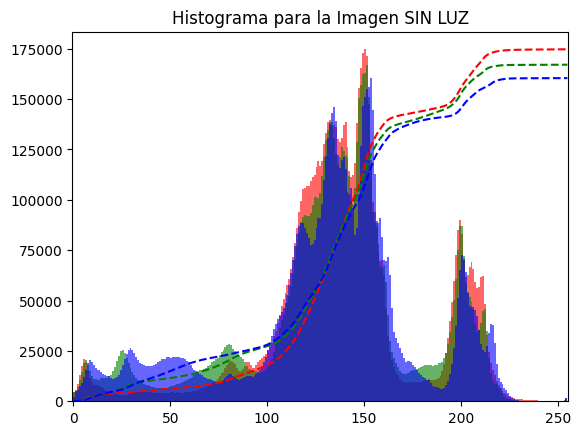

In [4]:
# Leer imágenes
image1 = cv2.imread('./imgs/luz.jpg')
image2 = cv2.imread('./imgs/noluz.jpg')

# Convertir de BGR a RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Plotear histogramas
plot_histogram(image1, 'Histograma para la Imagen LUZ')
plot_histogram(image2, 'Histograma para la Imagen SIN LUZ')

plt.show()

### 2.) Proponer una Distancia para Comparar Histogramas
En este caso usaremos la sumatoria de la diferencia al cuadrado

In [5]:
def compare_histograms(hist1, hist2):
    return np.sqrt(np.sum((hist1 - hist2) ** 2))

In [6]:

# Calcular histogramas para cada canal de color
hist_image1 = [cv2.calcHist([image1], [i], None, [256], [0, 256]) for i in range(3)]
hist_image2 = [cv2.calcHist([image2], [i], None, [256], [0, 256]) for i in range(3)]

# Comparar histogramas
distances = [compare_histograms(hist_image1[i], hist_image2[i]) for i in range(3)]
print("Distancias RGB: ", distances)


Distancias RGB:  [965320.8, 919460.94, 883679.1]


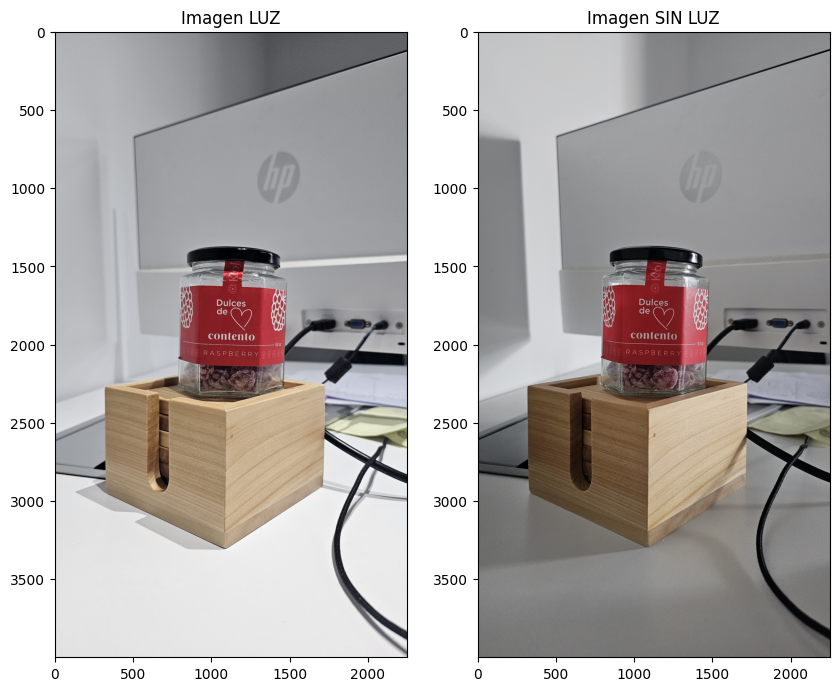

In [7]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image1,vmax=255,vmin=0)
plt.title('Imagen LUZ')
plt.subplot(1, 2, 2)
plt.imshow(image2,vmax=255,vmin=0)
plt.title('Imagen SIN LUZ')
plt.show()


### 3.) COMPARAR CON OTRAS IMAGENES

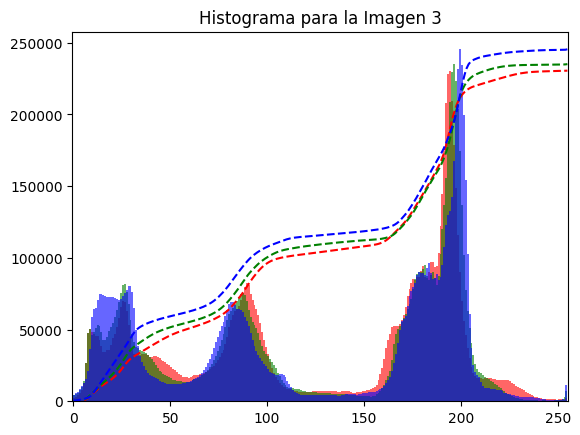

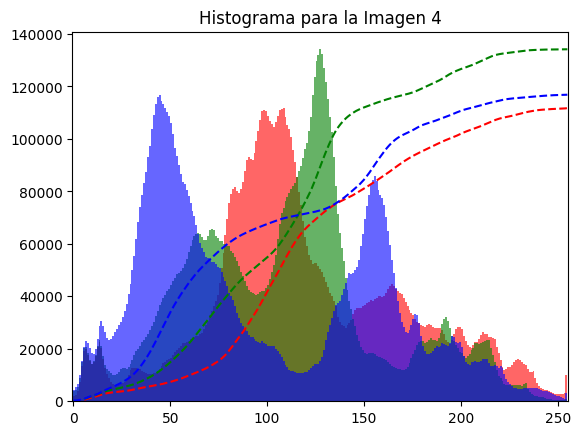

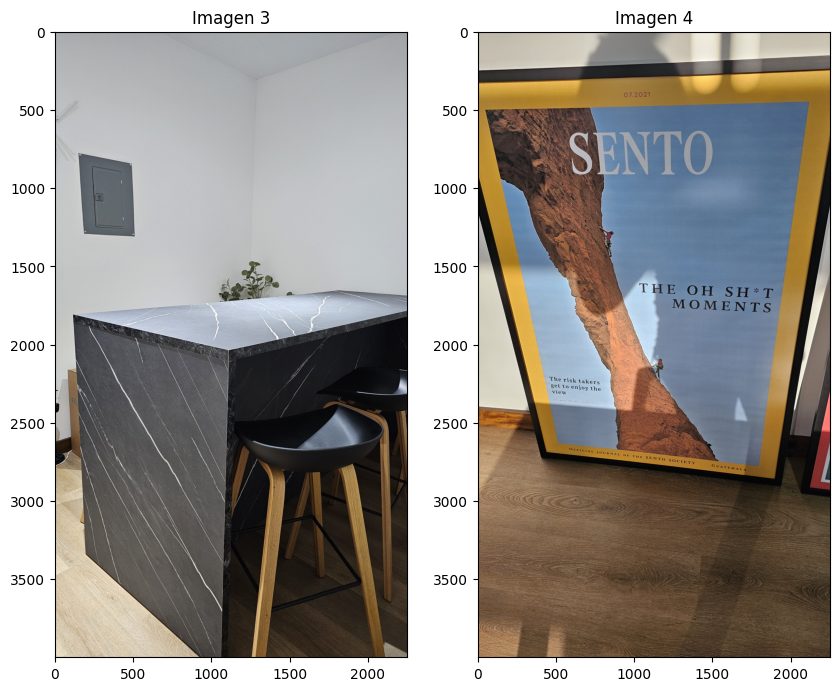

In [8]:
# Leer imágenes
image3 = cv2.imread('./imgs/mesa.jpg')
image4 = cv2.imread('./imgs/cuadro.jpg')

# Convertir de BGR a RGB
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Plotear histogramas
plot_histogram(image3, 'Histograma para la Imagen 3')
plot_histogram(image4, 'Histograma para la Imagen 4')

plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image3,vmax=255,vmin=0)
plt.title('Imagen 3')
plt.subplot(1, 2, 2)
plt.imshow(image4,vmax=255,vmin=0)
plt.title('Imagen 4')
plt.show()


In [9]:

# Calcular histogramas para cada canal de color
hist_image3 = [cv2.calcHist([image3], [i], None, [256], [0, 256]) for i in range(3)]
hist_image4 = [cv2.calcHist([image4], [i], None, [256], [0, 256]) for i in range(3)]

# Comparar histogramas
distances13 = [compare_histograms(hist_image1[i], hist_image3[i]) for i in range(3)]
distances14 = [compare_histograms(hist_image1[i], hist_image4[i]) for i in range(3)]
distances23 = [compare_histograms(hist_image2[i], hist_image3[i]) for i in range(3)]
distances24 = [compare_histograms(hist_image2[i], hist_image4[i]) for i in range(3)]

print("DIFERENCIA ENTRE IMAGEN 1 Y 2: ", distances)
print("--------------------------------------")
print("DIFERENCIA ENTRE IMAGEN 1 Y 3: ", distances13)
print("DIFERENCIA ENTRE IMAGEN 1 Y 4: ", distances14)
print("--------------------------------------")
print("DIFERENCIA ENTRE IMAGEN 2 Y 3: ", distances23)
print("DIFERENCIA ENTRE IMAGEN 2 Y 4: ", distances24)


DIFERENCIA ENTRE IMAGEN 1 Y 2:  [965320.8, 919460.94, 883679.1]
--------------------------------------
DIFERENCIA ENTRE IMAGEN 1 Y 3:  [924664.94, 984999.7, 972643.7]
DIFERENCIA ENTRE IMAGEN 1 Y 4:  [912349.9, 982661.75, 838694.4]
--------------------------------------
DIFERENCIA ENTRE IMAGEN 2 Y 3:  [1045106.06, 986284.75, 1008792.3]
DIFERENCIA ENTRE IMAGEN 2 Y 4:  [744204.8, 587237.25, 705389.56]


### 4.) Convertir a HSV

In [10]:
image1_hsv = cv2.cvtColor(image1, cv2.COLOR_RGB2HSV)
image2_hsv = cv2.cvtColor(image2, cv2.COLOR_RGB2HSV)


### 5.) Histograma en H,S


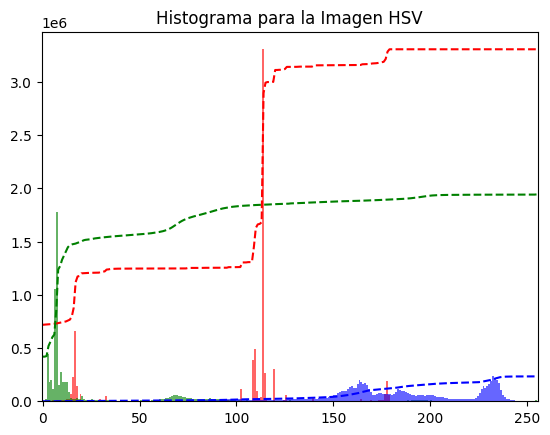

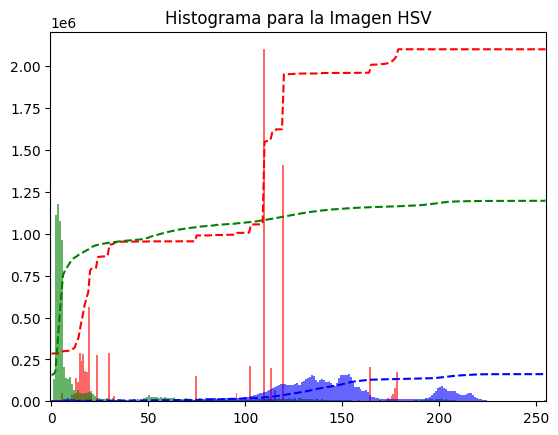

In [13]:
plot_histogram(image1_hsv, 'Histograma para la Imagen HSV')
plot_histogram(image2_hsv, 'Histograma para la Imagen HSV')

In [12]:
# Calcular histogramas para cada canal de color
hist_image1 = [cv2.calcHist([image1_hsv], [i], None, [256], [0, 256]) for i in range(3)]
hist_image2 = [cv2.calcHist([image2_hsv], [i], None, [256], [0, 256]) for i in range(3)]

# Comparar histogramas
distances = [compare_histograms(hist_image1[i], hist_image2[i]) for i in range(3)]
print("Distancias RGB: ", distances)

Distancias RGB:  [3867309.2, 2643073.0, 971961.5]


## 3. Implementar una funcion de equalizacion de histograma para una imagen en escala de grises.

In [ ]:
def histEq(I):
  Iflat = I.ravel()

  histogram_array = np.bincount(Iflat,minlength=256)

  #normalize
  num_pixeles = histogram_array.sum()
  histogram_array = histogram_array / num_pixeles

  # cumulative histogram
  chistogram_array = histogram_array.cumsum()
  transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

  img_list = list(Iflat)

  eg_img_list = [transform_map[p] for p in img_list]

  Ieq = np.reshape(np.asarray(eg_img_list),I.shape)

  return Ieq


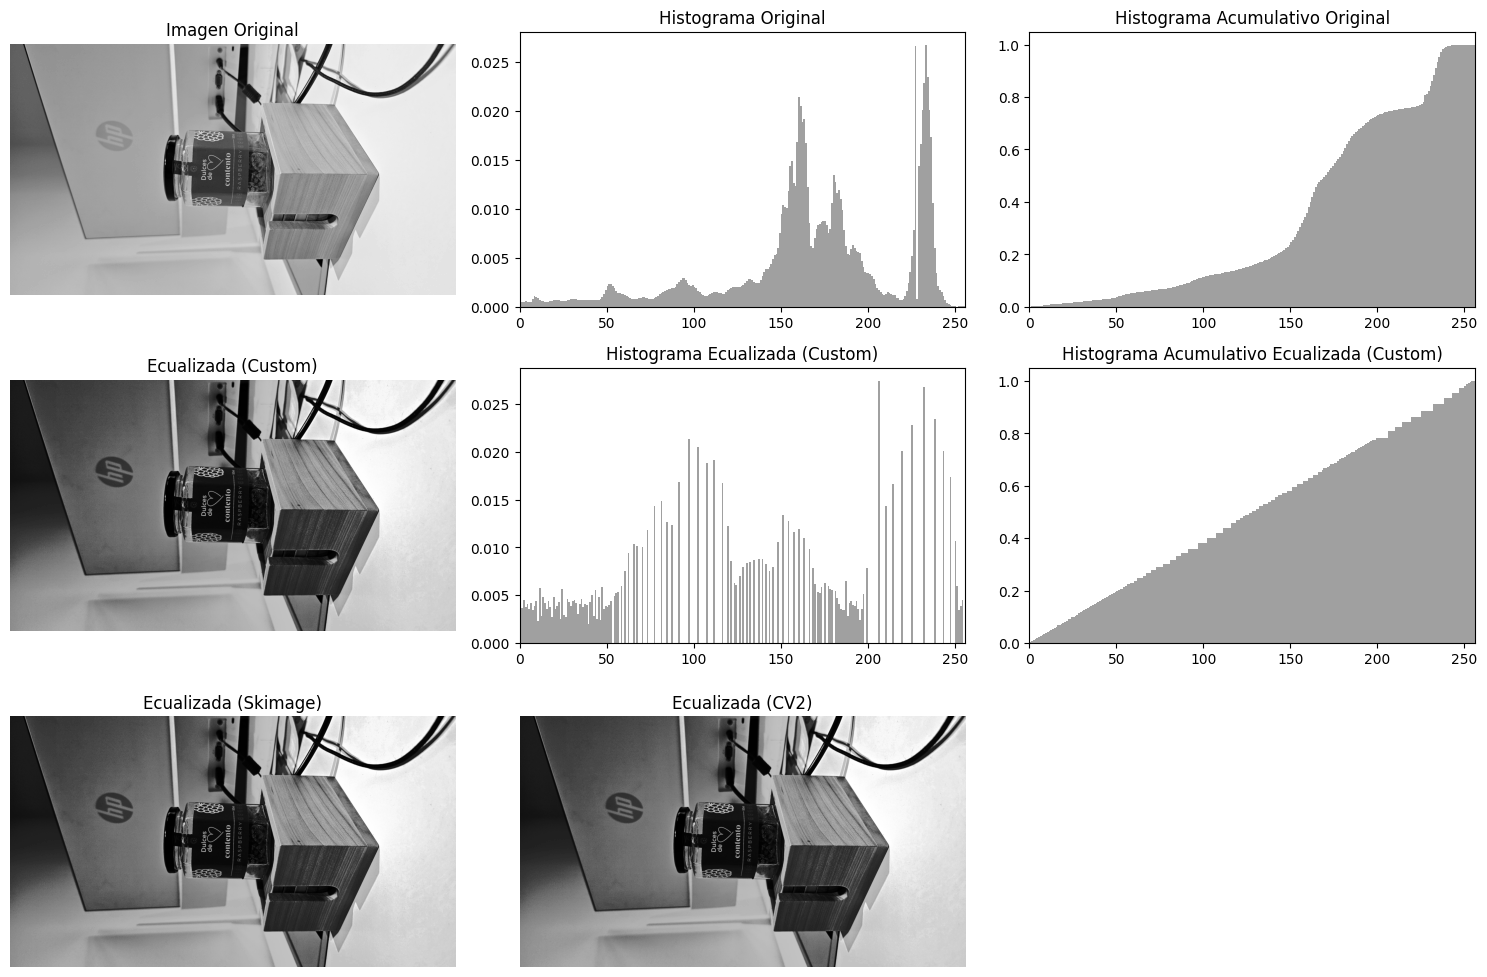